In [1]:
import torch
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt
from model import Network
from data import corrupt_mnist
from tqdm import tqdm
import typer
from classif import classification

In [2]:
app= typer.Typer() #creating instance if the class

def train_validation(model, train_dataloaders, test_dataloaders, criterion, epochs, optimizer):
    train_losses = []
    test_losses = []
    train_accuracies = []
    test_accuracies = []
    
    print("Training started...")
    
    for epoch in (range(epochs)):
        # Training phase
        model.train()
        running_loss = 0.0
        correct_train = 0
        total_train = 0
        
        train_bar = tqdm(train_dataloaders, desc=f"Epoch {epoch+1}/{epochs} - Training", leave=False)
        
        for data_train, labels_train in train_bar:
            optimizer.zero_grad()
            output = model(data_train)
            loss = criterion(output, labels_train)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
            
            # Calculate training accuracy
            _, predicted = torch.max(output.data, 1)
            total_train += labels_train.size(0)
            correct_train += (predicted == labels_train).sum().item()
            
            # Update progress bar
            train_bar.set_postfix({
                'Loss': f'{loss.item():.4f}',
                'Acc': f'{100 * correct_train / total_train:.2f}%'
            })
        
        # Calculate average training metrics
        avg_train_loss = running_loss / len(train_dataloaders)
        train_accuracy = 100 * correct_train / total_train
        
        train_losses.append(avg_train_loss)
        train_accuracies.append(train_accuracy)
        
        # Validation phase
        model.eval()
        running_loss_test = 0.0
        correct_test = 0
        total_test = 0
        
        test_bar = tqdm(test_dataloaders, desc=f"Epoch {epoch+1}/{epochs} - Validation", leave=False)
        
        with torch.no_grad():
            for data_test, labels_test in test_bar:
                output = model(data_test)
                loss = criterion(output, labels_test)
                running_loss_test += loss.item()
                
                # Calculate test accuracy
                _, predicted = torch.max(output.data, 1)
                total_test += labels_test.size(0)
                correct_test += (predicted == labels_test).sum().item()
                
                # Update progress bar
                test_bar.set_postfix({
                    'Loss': f'{loss.item():.4f}',
                    'Acc': f'{100 * correct_test / total_test:.2f}%'
                })
        
            # Calculate average test metrics
            avg_test_loss = running_loss_test / len(test_dataloaders)
            test_accuracy = 100 * correct_test / total_test
            
            test_losses.append(avg_test_loss)
            test_accuracies.append(test_accuracy)
        
        # Print epoch summary
        print(f'\nEpoch {epoch+1}/{epochs}:')
        print(f'Train Loss: {avg_train_loss:.4f}, Train Acc: {train_accuracy:.2f}%')
        print(f'Test Loss: {avg_test_loss:.4f}, Test Acc: {test_accuracy:.2f}%')
        print('-' * 50)
    
    return train_losses, test_losses, train_accuracies, test_accuracies



In [ ]:
# model = Network()
# train_dataloaders, test_dataloaders = corrupt_mnist()
# criterion = nn.CrossEntropyLoss()
# epochs= 20
# optimizer= optim.Adam(model.parameters(), lr = 0.001)
# train_losses, test_losses, train_accuracies, test_accuracies = train_validation(model, train_dataloaders, test_dataloaders, criterion, epochs, optimizer)


Training started...



Epoch 1/20:
Train Loss: 1.9615, Train Acc: 49.80%
Test Loss: 1.8377, Test Acc: 61.76%
--------------------------------------------------



Epoch 2/20:
Train Loss: 1.8058, Train Acc: 65.43%
Test Loss: 1.8044, Test Acc: 65.40%
--------------------------------------------------



Epoch 3/20:
Train Loss: 1.7386, Train Acc: 72.26%
Test Loss: 1.7059, Test Acc: 75.28%
--------------------------------------------------



Epoch 4/20:
Train Loss: 1.6750, Train Acc: 78.67%
Test Loss: 1.6243, Test Acc: 83.80%
--------------------------------------------------



Epoch 5/20:
Train Loss: 1.6056, Train Acc: 85.67%
Test Loss: 1.6205, Test Acc: 83.94%
--------------------------------------------------



Epoch 6/20:
Train Loss: 1.5462, Train Acc: 91.60%
Test Loss: 1.5335, Test Acc: 92.96%
--------------------------------------------------



Epoch 7/20:
Train Loss: 1.5106, Train Acc: 95.15%
Test Loss: 1.5341, Test Acc: 92.64%
--------------------------------------------------



Epoch 8/20:
Train Loss: 1.5037, Train Acc: 95.86%
Test Loss: 1.5165, Test Acc: 94.60%
--------------------------------------------------



Epoch 9/20:
Train Loss: 1.4985, Train Acc: 96.32%
Test Loss: 1.5162, Test Acc: 94.42%
--------------------------------------------------



Epoch 10/20:
Train Loss: 1.4940, Train Acc: 96.77%
Test Loss: 1.5129, Test Acc: 94.74%
--------------------------------------------------



Epoch 11/20:
Train Loss: 1.4908, Train Acc: 97.04%
Test Loss: 1.5134, Test Acc: 94.64%
--------------------------------------------------



Epoch 12/20:
Train Loss: 1.4899, Train Acc: 97.16%
Test Loss: 1.5322, Test Acc: 92.70%
--------------------------------------------------



Epoch 13/20:
Train Loss: 1.4876, Train Acc: 97.36%
Test Loss: 1.5114, Test Acc: 94.90%
--------------------------------------------------



Epoch 14/20:
Train Loss: 1.4847, Train Acc: 97.69%
Test Loss: 1.5105, Test Acc: 95.00%
--------------------------------------------------



Epoch 15/20:
Train Loss: 1.4835, Train Acc: 97.78%
Test Loss: 1.5009, Test Acc: 96.00%
--------------------------------------------------



Epoch 16/20:
Train Loss: 1.4825, Train Acc: 97.89%
Test Loss: 1.5009, Test Acc: 95.96%
--------------------------------------------------



Epoch 17/20:
Train Loss: 1.4803, Train Acc: 98.10%
Test Loss: 1.5161, Test Acc: 94.52%
--------------------------------------------------



Epoch 18/20:
Train Loss: 1.4814, Train Acc: 97.98%
Test Loss: 1.5129, Test Acc: 94.84%
--------------------------------------------------



Epoch 19/20:
Train Loss: 1.4795, Train Acc: 98.18%
Test Loss: 1.5100, Test Acc: 95.02%
--------------------------------------------------



Epoch 20/20:
Train Loss: 1.4803, Train Acc: 98.13%
Test Loss: 1.5219, Test Acc: 94.00%
--------------------------------------------------


In [3]:
# Updated plotting function
def plotting(train_loss, test_loss, train_acc, test_acc, save_path):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot losses
    ax1.plot(train_loss, label='Train Loss')
    ax1.plot(test_loss, label='Test Loss')
    ax1.set_xlabel('Epochs')
    ax1.set_ylabel('Loss')
    ax1.set_title('Training and Test Loss')
    ax1.legend()
    ax1.grid(True)
    
    # Plot accuracies
    ax2.plot(train_acc, label='Train Accuracy')
    ax2.plot(test_acc, label='Test Accuracy')
    ax2.set_xlabel('Epochs')
    ax2.set_ylabel('Accuracy (%)')
    ax2.set_title('Training and Test Accuracy')
    ax2.legend()
    ax2.grid(True)
    
    plt.savefig(save_path)
    plt.tight_layout()
    plt.show()

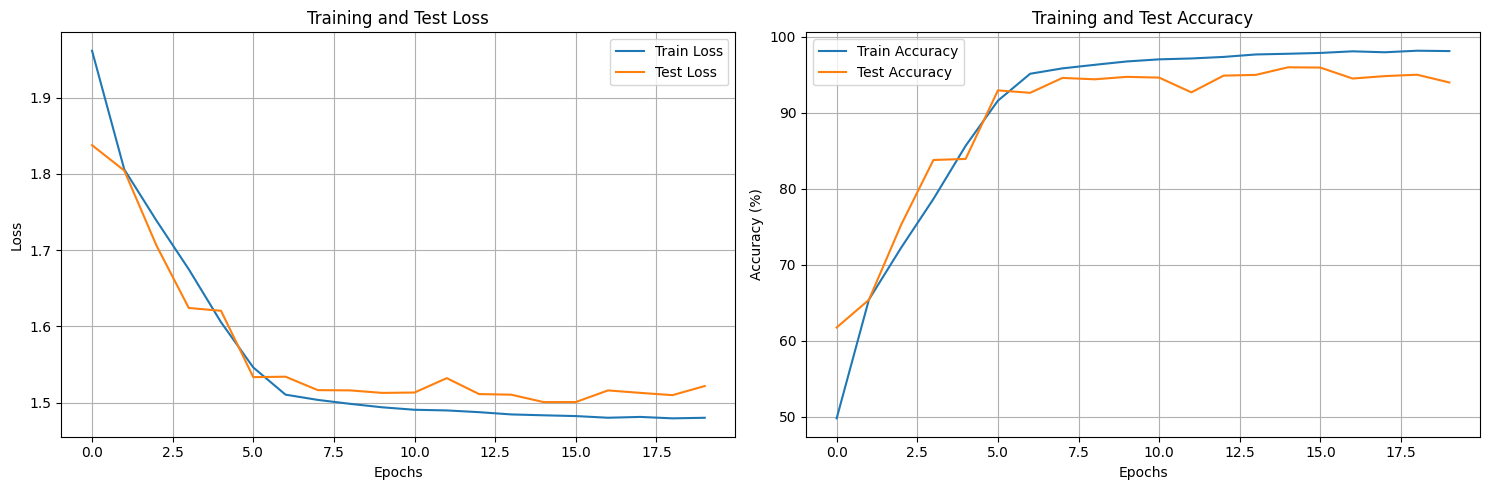

In [ ]:
# plotting(train_losses, test_losses, train_accuracies, test_accuracies)

In [4]:
@app.command()
def training_model(
        lr: float = typer.Option(0.001, "--lr", help="Learning rate"),
        epochs: int = typer.Option(10, "--epochs", help="Number of epochs"),
        model_name: str = typer.Option("model.pth", "--model-name", help="Name to save the model"),
        plot_graph: bool = typer.Option(True, "--plot/--no-plot", help="Generate training plots"),
        save_path: str = typer.Option("graph.png","--graph-path", help="graph location")):
        batch_number : int = typer.Option(1,"--batch_number", help="batch_number")


        print(f"🚀 Starting training with:")
        print(f"   Learning rate: {lr}")
        print(f"   Epochs: {epochs}")
        print(f"   Model will be saved as: {model_name}")
        print(f"   Plot graphs: {plot_graph}")

        model = Network()
        train_dataloaders, test_dataloaders = corrupt_mnist()
        criterion = nn.CrossEntropyLoss()
        epochs= epochs
        optimizer= optim.Adam(model.parameters(), lr = lr)
        train_losses, test_losses, train_accuracies, test_accuracies = train_validation(model, train_dataloaders, test_dataloaders, criterion, epochs, optimizer)
        


        # saving name
        torch.save(model.state_dict(),model_name)
        print(f"✅ Model saved successfully as: {model_name}")
        
        if plot_graph:
                print("📊 Generating training plots...")
                plotting(train_losses, test_losses, train_accuracies, test_accuracies,save_path)

        classification(batch_number,model_name)       
           
        return
        
    
        
        